# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime, time
print(datetime.datetime.now())

2019-06-11 16:41:44.783619


In [13]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Flatten,Dense, Dropout, Input, Lambda
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 

from keras.layers.merge import concatenate

from keras.models import Model

# https://keras.io/
!pip install -q keras
import keras

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-11 16:47:43.884570


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 1s 0us/step
2019-06-11 16:42:07.992365


(60000, 28, 28)
2019-06-11 16:42:12.746233


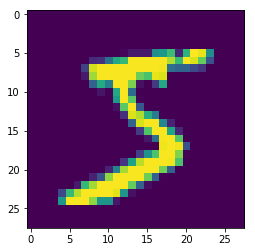

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-11 16:42:21.046811


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-11 16:42:27.019516


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-06-11 16:42:32.029628


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-11 16:42:39.963101


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-11 16:42:42.601429


In [0]:
img_rows = 28
img_cols = 28
img_channels = 1

In [15]:
## MAIN BLOCK
from keras.models import Model

x1 = Input(shape=(img_rows,img_cols,img_channels))
#Layer 1
x2 = Conv2D(32,(3,3),strides=(1,1),name='conv_1',border_mode='same',use_bias=False,activation='relu')(x1)
concatenate1 = concatenate([x1,x2],axis=-1)

x3 = Conv2D(32,(3,3),strides=(1,1),name='conv_2',border_mode='same',use_bias=False,activation='relu')(concatenate1)
concatenate2 = concatenate([concatenate1,x3],axis=-1)

x4 = MaxPooling2D(pool_size=(2, 2))(concatenate2)
x5 = Conv2D(32,(3,3),strides=(1,1),name='conv_3',border_mode='same',use_bias=False,activation='relu')(x4)
concatenate3 = concatenate([x4,x5],axis=-1)

x6 = Conv2D(32,(3,3),strides=(1,1),name='conv_4',border_mode='same',use_bias=False,activation='relu')(concatenate3)
concatenate4 = concatenate([concatenate3,x6],axis=-1)

x7 = Conv2D(32,(3,3),strides=(1,1),name='conv_5',border_mode='same',use_bias=False,activation='relu')(concatenate4)
concatenate5 = concatenate([x5,x6],axis=-1)
concatenate6 = concatenate([concatenate5,x7],axis=-1)

x8 = MaxPooling2D(pool_size=(2, 2))(concatenate6)
x9 = Conv2D(32,(3,3),strides=(1,1),name='conv_6',border_mode='same',use_bias=False,activation='relu')(x8)
concatenate7 = concatenate([x8,x9],axis=-1)

x10 = Conv2D(32,(3,3),strides=(1,1),name='conv_7',border_mode='same',use_bias=False,activation='relu')(concatenate7)
concatenate8 = concatenate([concatenate7,x10],axis=-1)

x11 = Conv2D(32,(3,3),strides=(1,1),name='conv_8',border_mode='same',use_bias=False,activation='relu')(concatenate8)

layer10 = Conv2D(10,(7,7),strides=(1,1),name='conv_9',use_bias=False)(x11)
layer11 = Flatten()(layer10)

output = Activation('softmax')(layer11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_1", use_bias=False, activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_2", use_bias=False, activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_3", use_bias=False, activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_4", use_bias=False, activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/pytho

In [17]:
model = Model(inputs=[x1], outputs=[output])  
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 28, 28, 32)   288         input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_9 (Concatenate)     (None, 28, 28, 33)   0           input_3[0][0]                    
                                                                 conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 28, 28, 32)   9504        concatenate_9[0][0]              
__________

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-11 16:48:58.319648


In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1085 - acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0375 - acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0259 - acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0209 - acc: 0.9935
Epoch 5/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0172 - acc: 0.9946
Epoch 6/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0125 - acc: 0.9960
Epoch 7/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0122 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0100 - acc: 0.9969
Epoch 9/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0076 - acc: 0.9976
Epoch 10/10
60000/60000 [==============================] - 13s 214us/step - loss: 

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-11 16:52:02.634917


In [21]:
print(score)
print(datetime.datetime.now())

[0.024877123938957538, 0.9929]
2019-06-11 16:52:04.751354
